### Read table data

In [ ]:
### Install

%pip install sqlalchemy pandas python-dotenv pymysql pyarrow matplotlib

In [18]:
### Imports

from sqlalchemy import create_engine, text
import pandas as pd
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt

In [4]:
### Load credentials

# .env file path
env_path = os.path.join("env", "credentials.env")

# Load .env file
load_dotenv(dotenv_path=env_path)

# Call credentials
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")

In [5]:
### connect to DB

db_url = f"mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}"


engine = create_engine(db_url)

query = text("SELECT * FROM situation.l12_proteinliganddocking")

# Save path for CSV and parquet files
save_path_parquet = "data/proteinliganddocking.parquet"
save_path_csv = "data/proteinliganddocking.csv"


try:
    with engine.connect() as connection:
        
        result = connection.execute(query)

        df = pd.DataFrame(result.fetchall(), columns=result.keys())
        
        df.to_parquet(save_path_parquet)
        print(f"Data (Parquet) successfully saved in '{save_path_parquet}'")
        df.to_csv(save_path_csv, index=False)
        print(f"Data (CSV) successfully saved in '{save_path_csv}'")
        
        connection.close()
except Exception as e:
    print(f"Error: {e}")

Data (Parquet) successfully saved in 'data/proteinliganddocking.parquet'
Data (CSV) successfully saved in 'data/proteinliganddocking.csv'


Affinity: 
 count    31.000000
mean      5.580645
std       1.004463
min       3.800000
25%       4.750000
50%       5.500000
75%       6.350000
max       7.300000
Name: affinity, dtype: float64 

Resolution: 
 count    31.000000
mean      2.048387
std       0.194715
min       1.700000
25%       1.950000
50%       2.000000
75%       2.100000
max       2.500000
Name: resolution, dtype: float64 

Classification: 
 classification
Enzyme       11
Transport    11
Receptor      9
Name: count, dtype: int64 



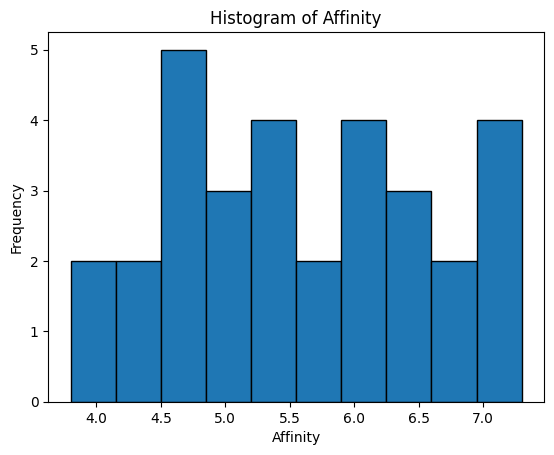

In [21]:
### Read and analyse data

data = pd.read_parquet(save_path_parquet, engine="pyarrow")
#data.head(5)

# Summary statistics for affinity and resolution
affinity_stats = df['affinity'].describe()
resolution_stats = df['resolution'].describe()

# Count of classifications
classification_counts = df['classification'].value_counts()

print("Affinity: \n", affinity_stats, "\n")
print("Resolution: \n", resolution_stats, "\n")
print("Classification: \n", classification_counts, "\n")

# Plotting the histogram for affinity
plt.hist(df['affinity'], bins=10, edgecolor='black')
plt.title('Histogram of Affinity')
plt.xlabel('Affinity')
plt.ylabel('Frequency')
plt.show()